In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [2]:
#data = keras.datasets.fashion_mnist

mnist_dataset, mnist_info = tfds.load(name='fashion_mnist', with_info=True, as_supervised=True)

In [3]:
#(train_images, train_labels), (test_images, test_labels) = data.load_data()
mnist_dataset

{'test': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [4]:
mnist_info

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [5]:
# once we have loaded the dataset, we can easily extract the training and testing dataset with the built references
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

In [6]:
# by default, TF has training and testing datasets, but no validation set, thus we must split it on our own
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
# let's cast this number to an integer, as a float may cause an error along the way
num_validation_samples = tf.cast(num_validation_samples, tf.int64)
num_validation_samples

<tf.Tensor: id=302, shape=(), dtype=int64, numpy=6000>

In [7]:
num_test_samples = mnist_info.splits['test'].num_examples
# once more, we'd prefer an integer (rather than the default float)
num_test_samples = tf.cast(num_test_samples, tf.int64)
num_test_samples

<tf.Tensor: id=304, shape=(), dtype=int64, numpy=10000>

In [8]:

def scale(image, label):
    
    image = tf.cast(image, tf.float32)
    image /= 255.

    return image, label


In [9]:
scaled_train_and_validation_data = mnist_train.map(scale)
scaled_train_and_validation_data

<MapDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

In [10]:
test_data = mnist_test.map(scale)
test_data

<MapDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

In [11]:
BUFFER_SIZE = 10000

In [12]:
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)
shuffled_train_and_validation_data

<ShuffleDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

In [13]:
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
validation_data

<TakeDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

In [14]:
trian_data = shuffled_train_and_validation_data.skip(num_validation_samples)
trian_data

<SkipDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

In [15]:
BATCH_SIZE = 100

In [54]:
trian_data = trian_data.batch(BATCH_SIZE)

In [17]:
validation_data = validation_data.batch(num_validation_samples)

In [57]:
test_data = test_data.batch(num_test_samples)

In [19]:
validation_inputs, validation_targets = next(iter(validation_data))

In [20]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',' ANkle boot']

In [21]:
input_size = 784
output_size = 10
hidden_layer_size = 128

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28, 1)),
    keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    keras.layers.Dense(hidden_layer_size, activation='relu'), # 3rd hidden layer
    keras.layers.Dense(output_size, activation= 'softmax')
])

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
# determine the maximum number of epochs
NUM_EPOCHS = 5

# we fit the model, specifying the
# training data
# the total number of epochs
# and the validation data we just created ourselves in the format: (inputs,targets)
model.fit(trian_data,
    epochs=NUM_EPOCHS,
    validation_data=(validation_inputs, validation_targets),
    validation_steps=10,
    verbose = 2)

Epoch 1/5
540/540 - 11s - loss: 0.5452 - accuracy: 0.8076 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
540/540 - 6s - loss: 0.3806 - accuracy: 0.8622 - val_loss: 0.3523 - val_accuracy: 0.8735
Epoch 3/5
540/540 - 6s - loss: 0.3400 - accuracy: 0.8759 - val_loss: 0.3663 - val_accuracy: 0.8670
Epoch 4/5
540/540 - 6s - loss: 0.3185 - accuracy: 0.8833 - val_loss: 0.3093 - val_accuracy: 0.8853
Epoch 5/5
540/540 - 6s - loss: 0.2990 - accuracy: 0.8888 - val_loss: 0.2998 - val_accuracy: 0.8902


In [24]:
test_data

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

In [26]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 1s 950ms/step - loss: 0.3451 - accuracy: 0.8736


In [27]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.35. Test accuracy: 87.36%


In [32]:
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [34]:
prediction = model.predict(test_data)

In [35]:
pred_val = prediction[8]
pred_val

array([8.2368151e-06, 5.8968230e-06, 8.6147711e-06, 2.8596000e-06,
       5.0324525e-06, 5.2452664e-04, 5.4924508e-06, 9.9877328e-01,
       3.1615193e-05, 6.3445605e-04], dtype=float32)

In [36]:
print(np.argmax(pred_val))

7


In [37]:
print(class_name[np.argmax(pred_val)])

Sneaker


In [38]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

TypeError: 'BatchDataset' object is not subscriptable

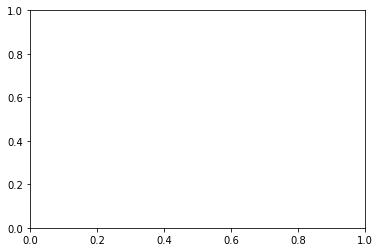

In [48]:
for i in range(100):
    plt.grid(False)
    plt.imshow(test_data[i], cmap = plt.cm.binary)
    plt.xlabel=("Actual:" + class_name[test_labels[i]])
    plt.title=("Prediction:" + class_name[np.argmax(pred_val)])
    plt.show()

    print("Actual:" + class_name[test_labels[i]])
    print("Prediction:" + class_name[np.argmax(prediction[i])])
    

In [59]:
test_data

<BatchDataset shapes: ((None, None, None, None, 28, 28, 1), (None, None, None, None)), types: (tf.float32, tf.int64)>

In [68]:
counter = 0
val = []
for i in test_data:
    val = i
    counter += 1 
    if counter > 8:
        break


In [69]:
for i in val:
    print(i)

tf.Tensor(
[[[[[[[0.        ]
      [0.        ]
      [0.        ]
      ...
      [0.        ]
      [0.        ]
      [0.        ]]

     [[0.        ]
      [0.        ]
      [0.        ]
      ...
      [0.        ]
      [0.        ]
      [0.        ]]

     [[0.        ]
      [0.        ]
      [0.        ]
      ...
      [0.        ]
      [0.        ]
      [0.        ]]

     ...

     [[0.        ]
      [0.        ]
      [0.        ]
      ...
      [0.        ]
      [0.        ]
      [0.        ]]

     [[0.        ]
      [0.        ]
      [0.        ]
      ...
      [0.        ]
      [0.        ]
      [0.        ]]

     [[0.        ]
      [0.        ]
      [0.        ]
      ...
      [0.        ]
      [0.        ]
      [0.        ]]]


    [[[0.        ]
      [0.        ]
      [0.        ]
      ...
      [0.        ]
      [0.        ]
      [0.        ]]

     [[0.        ]
      [0.        ]
      [0.        ]
      ...
      [0.        ]
      [0.